In [21]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
import sampen
import time

def diffs(a, b):
    l = min(len(a), len(b))
    return [abs(a[i] - b[i]) for i in range(l)]


def sample_entropy(U, m=2, r=0.2):
    "sample entropy from wikipedia"
    
    def _maxdist(x_i, x_j):
        result = max([abs(ua - va) for ua, va in zip(x_i, x_j)])
        return result

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    
    return -np.log(_phi(m + 1) / _phi(m))


def SampEn(L, m=2, r=0.2):
    N = len(L)
    B = 0.0
    A = 0.0
    
    
    # Split time series and save all templates of length m
    xmi = np.array([L[i : i + m] for i in range(N - m)])
    xmj = np.array([L[i : i + m] for i in range(N - m + 1)])

    # Save all matches minus the self-match, compute B
    B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) <= r) - 1 for xmii in xmi])

    # Similar for computing A
    m += 1
    xm = np.array([L[i : i + m] for i in range(N - m + 1)])

    A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) <= r) - 1 for xmi in xm])

    # Return SampEn
    return -np.log(A / B)

In [2]:
data_files = glob.glob('o*.dat')
print(data_files)

['o1k.dat', 'o10k.dat', 'o2k.dat', 'o5k.dat', 'o20k.dat', 'o50k.dat', 'o100k.dat', 'o200k.dat', 'o500k.dat', 'out2k.dat', 'o1000k.dat', 'out1000k.dat', 'out500k.dat']


In [6]:
lengths = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

#CUDA
sampen_cuda = []
times_cuda = []
for length in lengths:
#     print(length)
    with open(f'o{length}k.dat', 'rt') as f:
        content = f.readlines()
#         print(content[8])
        sampen_cuda.append(float(content[8].split(': ')[1]))
        times_cuda.append(float(content[9].split('user')[0]))

In [7]:
times_cuda, lengths, sampen_cuda

([0.06, 0.16, 0.39, 0.98, 2.75, 11.8, 39.53, 146.12, 853.79, 3686.22],
 [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
 [2.70805,
  2.120264,
  2.75684,
  2.147392,
  2.211613,
  2.10554,
  2.107155,
  2.18673,
  2.109178,
  2.181629])

Text(0, 0.5, 'SampEn')

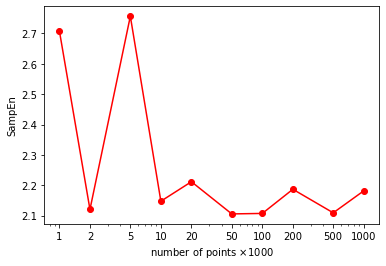

In [10]:
plt.semilogx(lengths, sampen_cuda, '-or')
plt.xticks(lengths, lengths) #[1, 10, 100, 500, 1000], [1, 10, 100, 500, 1000])
# plt.ylim([0, 3])
plt.xlabel(r'number of points $\times 1000$')
plt.ylabel('SampEn')

Text(0, 0.5, 'time [sec]')

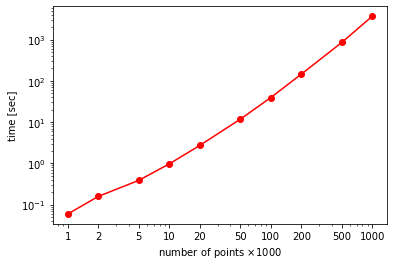

In [13]:
plt.loglog(lengths, times_cuda, '-or')
plt.xticks(lengths, lengths)
plt.xlabel(r'number of points $\times 1000$')
plt.ylabel('time [sec]')

# Python

In [72]:
gauss_data = glob.glob('data*k.dat')
gauss_data

['data10k.dat',
 'data100k.dat',
 'data1000k.dat',
 'data1k.dat',
 'data2k.dat',
 'data5k.dat',
 'data50k.dat',
 'data20k.dat',
 'data200k.dat',
 'data500k.dat']

In [44]:
lengths_python = [1, 2, 5, 10, 20, 50] #, 100, 200]
sampen_python = []
times_python = []
for length in lengths:
    d = np.genfromtxt(f'data{length}k.dat')
    t = time.time()
    sampen_python.append(sampen.sampen2(d)[2][1])
    times_python.append(time.time() - t)

KeyboardInterrupt: 

In [46]:
sampen_python, times_python

([1.02632519520008,
  1.0269842542936303,
  1.0213774246398317,
  1.0251616798323206,
  1.024911958972479,
  1.0216780065278852],
 [0.4636199474334717,
  1.8339133262634277,
  11.655877828598022,
  46.55596303939819,
  187.60889053344727,
  1196.5066592693329])

Text(0, 0.5, 'SampEn')

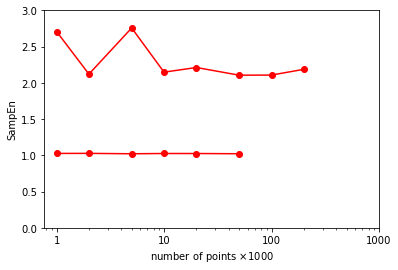

In [47]:
plt.semilogx(lengths, sampen_cuda, '-or')
plt.semilogx(lengths_python, sampen_python, '-or')
plt.xticks([1, 10, 100, 1000], [1, 10, 100, 1000])
plt.ylim([0, 3])
plt.xlabel(r'number of points $\times 1000$')
plt.ylabel('SampEn')

([<matplotlib.axis.XTick at 0x7f50c0e4d518>,
 <a list of 9 Text xticklabel objects>)

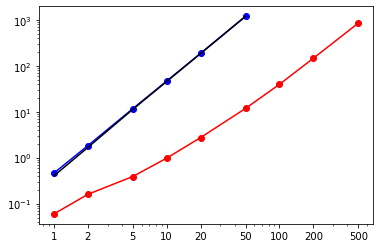

In [71]:
plt.loglog(lengths, times_cuda, '-or')
plt.loglog(lengths_python, times_python, '-ob')
plt.semilogx(lengths_python, diffs(times_cuda, times_python), 'k')
# plt.xticks(lengths_python, lengths_python)
plt.xticks(lengths, lengths)

([<matplotlib.axis.XTick at 0x7f50bf6254a8>,
 <a list of 6 Text xticklabel objects>)

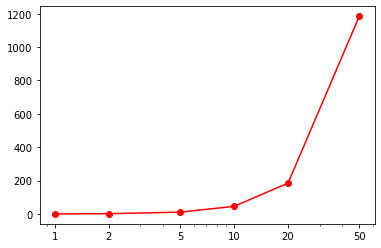

In [53]:
%%time
sampen.sampen2(np.genfromtxt(f'data5k.dat'))

CPU times: user 11.7 s, sys: 1e+03 ns, total: 11.7 s
Wall time: 11.7 s


[(0, 1.0184723355037948, 0.0017233735890098106),
 (1, 1.020183880995742, 0.002933016450899701),
 (2, 1.0213774246398317, 0.00380987066593324)]

In [18]:
# sampen.sampen2??

In [23]:
%%time
sample_entropy(np.genfromtxt(f'data5k.dat'))

CPU times: user 1min 8s, sys: 0 ns, total: 1min 8s
Wall time: 1min 8s


1.0218529275022163

In [25]:
%%time
t = time.time()
SampEn(np.genfromtxt(f'data5k.dat'))
print(time.time() - t)

2.713118076324463
CPU times: user 2.7 s, sys: 12 ms, total: 2.72 s
Wall time: 2.71 s


In [24]:
times_cuda

[0.06, 0.16, 0.39, 0.98, 2.75, 11.8, 39.53, 146.12, 853.79, 3686.22]